# Introducrtion to Machine Learning: Assignment #3
## Submission date: 09\07\2024, 23:55.
### Topics:
- Multiclass Classification
- PAC, VCdim
- Bias vs Variance
- Cross validation
- Linear Regression
- Decision Trees

Submitted by:

 **Student 1 Name+ID

 **Student 2 Name+ID

**Assignment Instruction:**

· Submissions in pairs only.

· Try to keep the code as clean, concise, and short as possible

· If you wish to work in your IDE, you can, but you **must**,  insert the script back to the matching cells of the notebook and run the code. <br/>Only the notebook will be submitted in moodle (in `.ipynb` format).

· <font color='red'>Please write your answers to question in red</font>.

**Important:** All plots, results and outputs should be included in the notebook as the cells' outputs (run all cells and do not clear the output). <br/>

**Important:** Your submission must be entirely your own. Any attempts of plagiarism (including ChatGPT) will lead to grade 0 and disciplinary actions.


## Question 1 - Multiclass SVM

You will implement and compare different multiclass methods in both separable and non separable cases.

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC


As seen in tutorials, One vs One is usually a better choice than other methods, even SKlearn uses it! <br/>
You are given a partial implementation of OvO classifier and need to complete it. Specifically:<br/>
- ```__init__(self, n_classes=2, C=1.0)``` - Init $\binom{n}{2}$ estimators, one for each pair of classes.

- ```fit(self, X, y)``` - given data and labels learns the classifiers using linear SVM. <br/>

- ```predict(self, X)``` - as learned in lectures, prediction for sample will be the majority class got most votes from all the classifiers.  Therefore, $\forall i<j$ predict who is the winner for X in the estimator $(i,j)$ and update the bins accordinly.

In [2]:
from collections import defaultdict

class OneVsOneClassifier:
    def __init__(self, n_classes=2, C=1.0):
        self.n_classes = n_classes
        self.estimators = {}
        for i in range(n_classes):
            for j in range(i + 1, n_classes):
                self.estimators[(i, j)] = SVC(C=C, kernel='linear')

    def fit(self, X, y):
        for i in range(self.n_classes):
            for j in range(i + 1, self.n_classes):
                temp_X = X[(y == i) | (y == j)]
                temp_y = y[(y == i) | (y == j)]
                self.estimators[(i, j)].fit(temp_X, temp_y)

    def predict(self, X):
        scores = np.zeros((self.n_classes, len(X)))
        for i in range(self.n_classes):
            for j in range(i + 1, self.n_classes):
                prediction = self.estimators[(i, j)].predict(X)
                scores[i, prediction == i] += 1
                scores[j, prediction == j] += 1
        return np.argmax(scores, axis=0)

    def score(self, X, y):
        y_pred = self.predict(X)
        return np.mean(y_pred == y)

The data

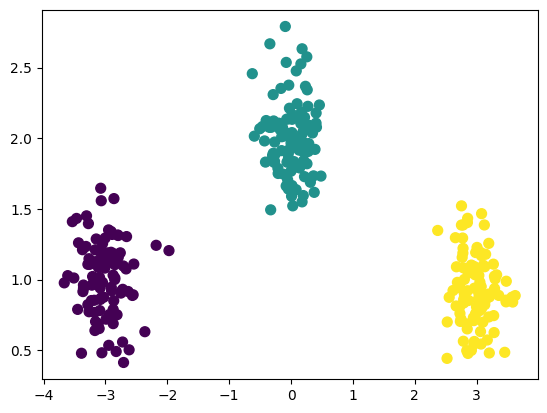

In [3]:
from sklearn.datasets import make_blobs

np.random.seed(2)
X, y = make_blobs(n_samples=300,cluster_std=.25, centers=np.array([(-3,1),(0,2),(3,1)]))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)

This will test the classifier we just built by plotting confusion matrix and draw the decision boundaries. <br/>
Does the value of C matter? <br/>

<font color='red'>Knowing that C is a regularization parameter that controls the trade-off between achieving a low error on the training data and minimizing the norm of the weights, then it can be concluded from the theory that smaller value of C creates a wider margin, but may allow more misclassifications. A larger value of C creates a narrower margin and may lead to overfitting, so, my answer is completely yes, the value of C does matter and should be chosen carefully</font>

[[100   0   0]
 [  0 100   0]
 [  0   0 100]]


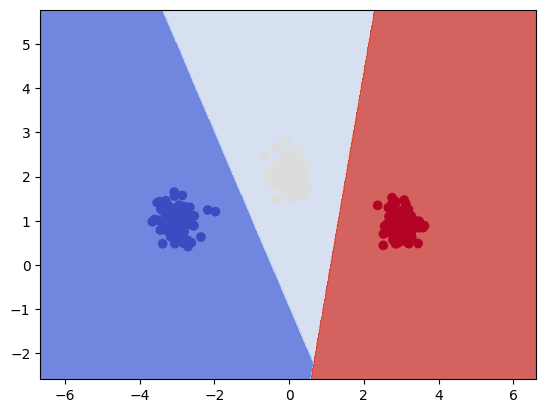

In [4]:
from sklearn import metrics

# Create and fit the classifier
clf_onevsall = OneVsOneClassifier(n_classes=3, C=2)
clf_onevsall.fit(X,y)

# Create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = min(X[:,0])-3,max(X[:,0])+3
y_min, y_max = min(X[:,1])-3,max(X[:,1])+3
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
mesh_input = np.c_[xx.ravel(), yy.ravel()]

# Predict and plot
Z = clf_onevsall.predict(mesh_input)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)

# Print confusion matrix
print(metrics.confusion_matrix(y, clf_onevsall.predict(X)))

Generate another data



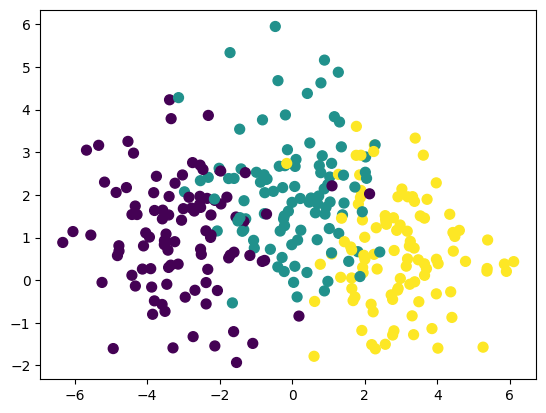

In [5]:
np.random.seed(2)
X, y = make_blobs(n_samples=300,cluster_std=1.25, centers=np.array([(-3,1),(0,2),(3,1)]))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)

Look at the train vs test for different values of C. <br/> Justify the plot, by checking what happens as $C\rightarrow 0$, $C\rightarrow \infty$ and mid value C.<br/>
<font color='red'>Write here your answer and explain</font>

100%|██████████| 4/4 [00:00<00:00, 190.47it/s]


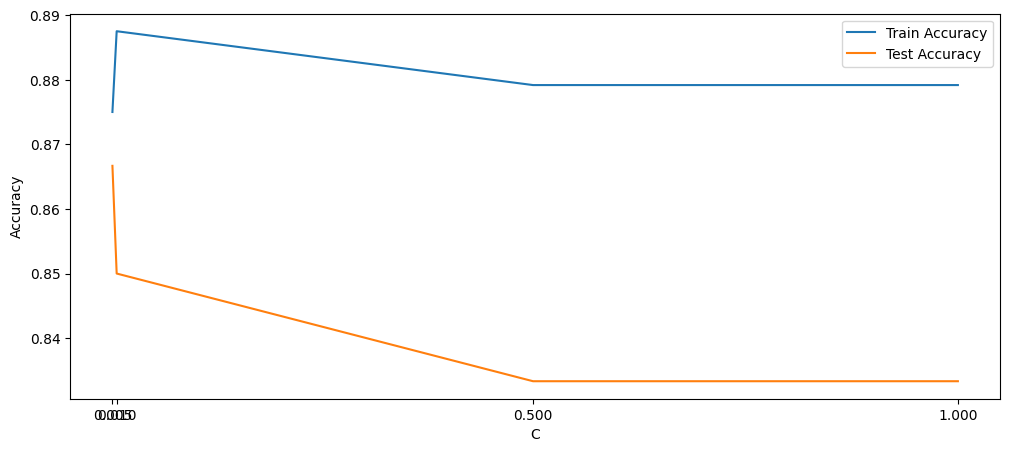

In [6]:
from sklearn.model_selection import train_test_split
from tqdm import tqdm

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a list of C values
C_values = [5e-3, 1e-2, 0.5, 1]

train_accuracies = []
test_accuracies = []

for C in tqdm(C_values):
    # Create a new OneVsOneClassifier instance
    clf_onevsall = OneVsOneClassifier(n_classes=3, C=C)

    # Fit the classifier on the training data
    clf_onevsall.fit(X_train, y_train)

    # Calculate the train and test accuracies
    train_accuracy = clf_onevsall.score(X_train, y_train)
    test_accuracy = clf_onevsall.score(X_test, y_test)

    # Append the accuracies to the lists
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plot the train and test accuracies as a function of C

plt.figure(figsize=(12,5))
plt.plot(C_values, train_accuracies, label="Train Accuracy")
plt.plot(C_values, test_accuracies, label="Test Accuracy")
plt.xlabel("C")
plt.xticks(C_values)
plt.ylabel("Accuracy")
plt.legend()
plt.show()


Now, you will experience little bit from softmax. It uses neural networks, but you dont have to understand it. The importand part is the preidction, which is obtained by:
```
def forward(self, x):
        out = self.linear(x)
        return torch.softmax(out, dim=1)
```
Note that this is exactly that you saw - linear score $s_j$ and then applying softmax.

The best results are obtained using 300 epochs (iterations) and in each iteration the batch size is the entire data. <br/>
1. What happens as you use 100,600 epcohs compared to 300? why is that?
2. Use 300 epochs with batch size 50 vs the entire data. How does the batch size affect the convergence of the problem?

<font color='red'>Write here your answers and explain them</font>

In [7]:
num_epochs = 300
batch_size = len(X_train) // 3
print(f"Training size is {X_train} samples and batch size is {batch_size}")

Training size is [[ 4.40560358e+00 -8.72299757e-01]
 [ 1.63979804e+00  5.26805585e-02]
 [-4.77652153e+00  8.08131005e-01]
 [ 3.47900558e+00  4.78757314e-01]
 [ 3.97435007e+00  2.28324744e+00]
 [-7.14227010e-01  2.36554008e+00]
 [ 1.81396237e+00  6.68840150e-01]
 [-4.09763487e+00  8.04457287e-01]
 [ 9.82682587e-01  2.24271087e+00]
 [ 3.24532862e+00 -9.48704625e-02]
 [-3.39188525e+00  1.96376467e+00]
 [ 9.34498677e-01  1.70887875e+00]
 [-5.24179448e+00 -5.21842071e-02]
 [-4.85308185e+00  2.05788986e+00]
 [ 1.28523112e+00  1.09765034e+00]
 [ 1.09968175e+00  2.21357665e+00]
 [ 3.37904304e+00 -3.73435559e-02]
 [ 1.97637600e+00  5.84200919e-01]
 [-3.40631204e+00  2.99706867e-01]
 [ 1.93536337e+00  1.60521495e+00]
 [ 2.80698755e+00 -1.18661100e+00]
 [ 1.56056287e+00  4.42841809e-01]
 [-1.54809814e+00  1.48259756e+00]
 [ 1.64181481e+00  7.11353128e-01]
 [ 1.16485920e+00  3.83541517e+00]
 [-3.57750669e+00  1.43861062e+00]
 [ 8.26580210e-02  2.66944794e+00]
 [ 3.64865616e+00  3.83756361e-01]
 [-

In [8]:
#@title This will train the model using softmax

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Convert data to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.LongTensor(y_train)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.LongTensor(y_test)

# Define the simple neural network
class SimpleNN(nn.Module):
    def __init__(self, input_size, output_size):
        super(SimpleNN, self).__init__()
        self.linear1 = nn.Linear(input_size, output_size)
        self.linear1.weight.data.fill_(1)
        self.linear1.bias.data.fill_(1)

    def forward(self, x):
        out = self.linear1(x)
        return torch.softmax(out, dim=1)

# Set hyperparameters
input_size = X_train_tensor.shape[1]
output_size = len(torch.unique(y_train_tensor))
learning_rate = 0.01

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Instantiate the model and define the optimizer
model = SimpleNN(input_size, output_size)
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Training loop
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode

    for inputs, targets in train_loader:
        optimizer.zero_grad()  # Clear gradients

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

    #if (epoch + 1) % 10 == 0:
    #    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model on test data
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    correct = 0
    total = 0
    for inputs, targets in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

    accuracy = correct / total
    print(f'Accuracy on test set: {accuracy:.4f}')

Accuracy on test set: 0.8000


array([[94,  4,  2],
       [19, 69, 12],
       [ 0,  9, 91]], dtype=int64)

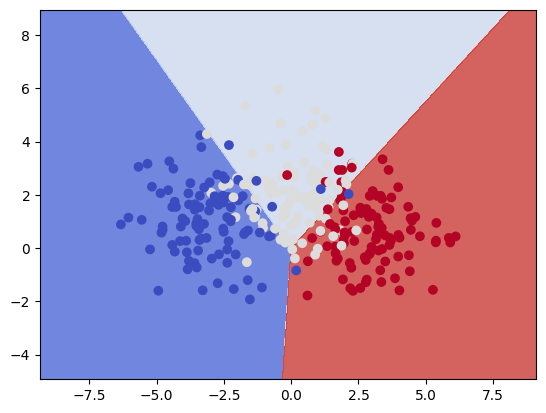

In [9]:
#@title This will plot the boundaries of the model

def predict(data):
    outputs = model(torch.tensor(data, dtype=torch.float32))
    _, predicted = torch.max(outputs, 1)
    return predicted

# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = min(X[:,0])-3,max(X[:,0])+3
y_min, y_max = min(X[:,1])-3,max(X[:,1])+3
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
mesh_input = np.c_[xx.ravel(), yy.ravel()]

Z = predict(mesh_input)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)

metrics.confusion_matrix(y, predict(X))

## Question 2 - Linear Regression
You are requested by the Charles Darvin himself to predict the age of abalone from physical measurements.
The dataset consists of 7 continious features that he has collected for you.

In [10]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

We define the following:
-	X, 2d matrix from size n x d which represents the training samples.
-	y, array from size n which represents the target value for the corresponding sample.

Implement the function Linreg_sol(X,y) which outputs the closed form solution for linear regression on X,y. <br/>
Don't use pinv

In [11]:
def Linreg_sol(X, y):
    # Add a column of ones for the bias term
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    
    # Compute the closed form solution
    XtX_inv = np.linalg.inv(np.dot(X.T, X))
    XtY = np.dot(X.T, y)
    theta = np.dot(XtX_inv, XtY)
    
    return theta

Load data from https://sharon.srworkspace.com/ml/datasets/hw3/abalone.csv

In [12]:
# Load the data
url = "https://sharon.srworkspace.com/ml/datasets/hw3/abalone.csv"
data = pd.read_csv(url)

# Display the first few rows of the data
print(data.head())

   0.455  0.365  0.095   0.514  0.2245   0.101   0.15  15
0  0.350  0.265  0.090  0.2255  0.0995  0.0485  0.070   7
1  0.530  0.420  0.135  0.6770  0.2565  0.1415  0.210   9
2  0.440  0.365  0.125  0.5160  0.2155  0.1140  0.155  10
3  0.330  0.255  0.080  0.2050  0.0895  0.0395  0.055   7
4  0.425  0.300  0.095  0.3515  0.1410  0.0775  0.120   8


Your tasks are:
- Convert to numpy
- Preproccess the data
- Find the weight vector and the bias

In [13]:
from sklearn.preprocessing import StandardScaler

# Convert to numpy
data_np = data.values

# Separate features and target
X = data_np[:, :-1]
y = data_np[:, -1]

# Preprocess the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Find the weight vector and the bias
weights = Linreg_sol(X_scaled, y)

# Print the linear line
print(f'The linear line is {weights[1]:.2f}x1+{weights[2]:.2f}x2+{weights[3]:.2f}x3+{weights[4]:.2f}x4+{weights[5]:.2f}x5+{weights[6]:.2f}x6+{weights[7]:.2f}x7+{weights[0]:.2f}=0')

The linear line is -0.18x1+1.32x2+0.50x3+4.53x4+-4.49x5+-1.08x6+1.20x7+9.93=0


Now, implement 'Linreg_sol_via_GD' which implement gradient descent on the linear regression problem. The stopping criterion should be based only by the iterations number recived as parameter

In [14]:
def Linreg_sol_via_GD(X, y, lr, iter_number):
    X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)  # Add a column of ones for the bias term
    w = np.ones(X.shape[1])
    for _ in range(iter_number):
        gradient = np.dot(X.T, (np.dot(X, w) - y)) / len(y)
        w = w - lr * gradient
    return w

The following code measures the number of iterations as a function of the error gap between the returned weights and the correct solution. <br/>
Conclude the complexity formula required - How many iterations do we need as a function of the error, $\varepsilon$? Make sure to include the $𝚶$ notation in your answer. <br/>
Note: This error is sometimes called 'gap'. <br/>
<font color='red'>Write your answer here and explain it</font>

100%|██████████| 90/90 [00:49<00:00,  1.83it/s]


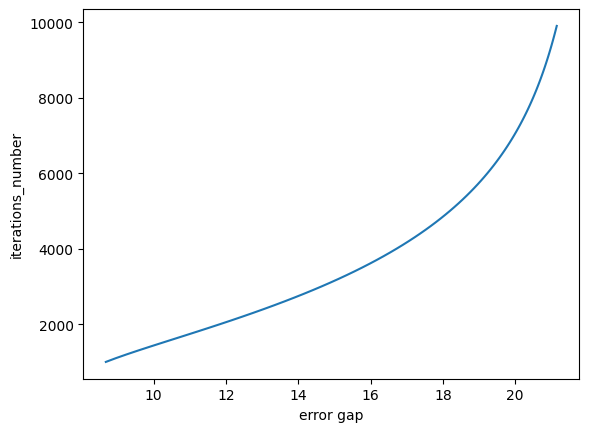

In [15]:
w_real = weights

iters = np.arange(1000, 10_000, 100)
gaps = []

for iter in tqdm(iters):
    w = Linreg_sol_via_GD(X, y, iter_number=iter, lr=0.1)
    gaps.append(np.linalg.norm(w_real - w))

plt.plot(gaps, iters)
plt.ylabel("iterations_number")
plt.xlabel("error gap")
plt.show()

In the second part of the task, we will see the features dependence and try to solve it.

Calculate the the value of $\text{Cov}(X)=\frac{1}{n-1}(X-\mu)^\top (X-\mu)$? <br/>
- What can you imply from this about the features?
- Can we imply something on $X^\top X$? Must its det be 0?

Note: In your calculations, make sure the bias is not included as feature. <br/>
<font color='red'>Write your answers here and explain it</font>

In [16]:
import numpy as np

def calculate_covariance(X):
    # Ensure the bias is not included as a feature
    if np.all(X[:, 0] == 1):
        X = X[:, 1:]
    
    # Calculate the covariance matrix
    covariance_matrix = np.cov(X, rowvar=False)
    
    return covariance_matrix

# Use the function
covariance_matrix = calculate_covariance(X)
print(covariance_matrix)

[[0.01442462 0.01176293 0.00415717 0.05449856 0.02393845 0.01188876
  0.0150093 ]
 [0.01176293 0.00985047 0.00346092 0.04504574 0.01967753 0.00978882
  0.01250872]
 [0.00415717 0.00346092 0.00174945 0.01680414 0.00719517 0.0036602
  0.00475909]
 [0.05449856 0.04504574 0.01680414 0.24051526 0.10553314 0.0519526
  0.06522479]
 [0.02393845 0.01967753 0.00719517 0.10553314 0.04927499 0.02267776
  0.02727462]
 [0.01188876 0.00978882 0.0036602  0.0519526  0.02267776 0.01201664
  0.01385118]
 [0.0150093  0.01250872 0.00475909 0.06522479 0.02727462 0.01385118
  0.01938013]]


Implement the solution to ridge regression using GD.

In [17]:
def Linreg_sol_Ridge_via_GD(X, y, lr, iter_number, lamda):
    w = np.ones(X.shape[1])
    for _ in range(iter_number):
        gradient = np.dot(X.T, (np.dot(X, w) - y)) / len(y) + lamda * w
        w = w - lr * gradient
    return w

The following code measures the mse error as function of the regularization hyperparameter lamda. <br/>Explain the origin to the mse' behaviour as function of lamda in this problem. <br/>
<font color='red'>Write your answer here and explain it</font>

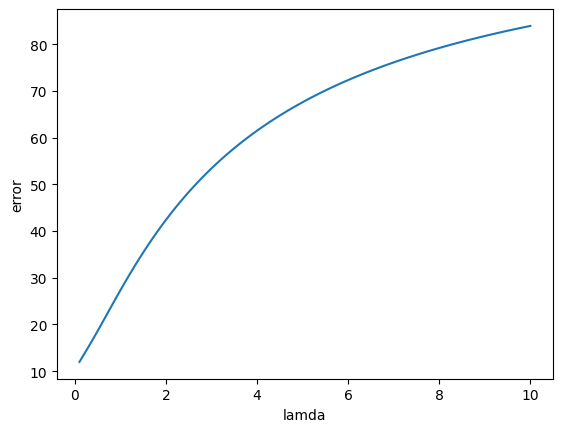

Optimal lambda: 0.1


In [18]:
mses = []
lamdas = np.arange(0.1, 10.1, 0.1)
optimal_lamda = lamdas[0]
min_mse = float('inf')
lr = 0.01  # Define the learning rate

for lamda in lamdas:
    w = Linreg_sol_Ridge_via_GD(X, y, lr, iter_number=1000, lamda=lamda)
    preds = np.dot(X, w)
    mse = np.mean((preds - y) ** 2)
    mses.append(mse)
    
    # Update optimal lambda if current mse is lower than min_mse
    if mse < min_mse:
        min_mse = mse
        optimal_lamda = lamda

plt.plot(lamdas, mses)
plt.ylabel("error")
plt.xlabel("lamda")
plt.show()

print(f"Optimal lambda: {optimal_lamda}")

## Question 3 - Decision tree

Recall the wine dataset from hw1, where we classified wine types based on their physical and chemical properties. You will do it, but this time with decision trees!

In [68]:
# Import libraries

import numpy as np
import pandas as pd

In [69]:
# Load the data, print the first rows

data = pd.read_csv('https://sharon.srworkspace.com/ml/datasets/hw3/banknote_authentication.csv')
data.head(3)

,var,skew,curt,entropy,class
0,3.6216,8.6661,-2.8073,-0.44699,0
1,4.5459,8.1674,-2.4586,-1.46210,0
2,3.8660,-2.6383,1.9242,0.10645,0


Complete this missing implementation of the following functions:
- ```calculate_entropy(self, data)``` – given data, compute the entropy, where the distribution is over its labels (target class).
- ```calculate_information_gain(self, data, feature)``` – given data and specific feature, compute the information gain given by selecting that feature.

Algorithm: The data is continuous, so create 10 thresholds between the min and max values of that feature. For each threshold, split to left tree and right tree and calculate the gain. Choose the threshold which gives the highest gain, along with the gain itself (to later compare between features) <br/>

Tip: To split the tree (represented by data df), use filter_data.
For example, when calculating the gain of 'skew' with threshold 0.5, you can create the left tree by use ```filter_data(data, 'skew', '0.5', left=True)``` to obtain only those samples.

In [76]:
import numpy as np
import pandas as pd

class DecisionTree:
    def __init__(self, max_depth=np.inf):
        self.tree = {}
        self.max_depth = max_depth

    def calculate_entropy(self, data):
        labels = data.iloc[:, -1]
        label_counts = labels.value_counts()
        probabilities = label_counts / len(labels)
        # Ensure probabilities are non-zero before taking log
        probabilities = probabilities[probabilities > 0]
        entropy = -sum(probabilities * np.log2(probabilities))
        return entropy

    def calculate_information_gain(self, data, feature):
        total_entropy = self.calculate_entropy(data)
        information_gain = total_entropy

        feature_values = data[feature]
        min_val, max_val = feature_values.min(), feature_values.max()
        thresholds = np.linspace(min_val, max_val, 11)[1:-1]  # 10 thresholds between min and max

        best_threshold = None
        best_gain = -np.inf

        for threshold in thresholds:
            left_data = self.filter_data(data, feature, threshold, left=True)
            right_data = self.filter_data(data, feature, threshold, left=False)
            
            left_entropy = self.calculate_entropy(left_data) if not left_data.empty else 0
            right_entropy = self.calculate_entropy(right_data) if not right_data.empty else 0
            
            left_weight = len(left_data) / len(data)
            right_weight = len(right_data) / len(data)
            
            weighted_entropy = left_weight * left_entropy + right_weight * right_entropy
            gain = total_entropy - weighted_entropy
            
            if gain > best_gain:
                best_gain = gain
                best_threshold = threshold

        return best_gain, best_threshold

    def filter_data(self, data, feature, value, left=True):
        if left:
            return data[data[feature] <= value].drop(feature, axis=1)
        else:
            return data[data[feature] > value].drop(feature, axis=1)

    def create_tree(self, data, depth=0):
        if data.empty:
            return "Empty Data"

        labels = data.iloc[:, -1]

        if len(np.unique(labels)) == 1:
            return list(labels)[0]

        if depth >= self.max_depth:
            unique_labels, label_counts = np.unique(labels, return_counts=True)
            majority_label = unique_labels[label_counts.argmax()]
            return majority_label

        features = data.columns.tolist()[:-1]
        if len(features) == 0:
            unique_labels, label_counts = np.unique(labels, return_counts=True)
            majority_label = unique_labels[label_counts.argmax()]
            return majority_label

        selected_feature = None
        best_gain = 0
        best_threshold = None

        for feature in features:
            gain, threshold = self.calculate_information_gain(data, feature)
            if gain > best_gain:
                selected_feature = feature
                best_threshold = threshold
                best_gain = gain

        tree_node = {}
        tree_node[(selected_feature, f"<={best_threshold}")] = self.create_tree(self.filter_data(data, selected_feature, best_threshold, left=True), depth+1)
        tree_node[(selected_feature, f">{best_threshold}")] = self.create_tree(self.filter_data(data, selected_feature, best_threshold, left=False), depth+1)

        if not isinstance(tree_node[(selected_feature, f"<={best_threshold}")], dict) and \
                not isinstance(tree_node[(selected_feature, f">{best_threshold}")], dict):
            if tree_node[(selected_feature, f"<={best_threshold}")] == tree_node[(selected_feature, f">{best_threshold}")]:
                return tree_node[(selected_feature, f"<={best_threshold}")] 

        return tree_node

    def fit(self, data):
        self.tree = self.create_tree(data)

    def predict(self, X):
        predictions = []

        for _, row in X.iterrows():
            current_node = self.tree
            while isinstance(current_node, dict):
                split_condition = next(iter(current_node))
                feature, condition = split_condition
                threshold = float(condition[2:])
                if row[feature] <= threshold:
                    current_node = current_node[(feature, f"<={threshold}")]
                else:
                    current_node = current_node[(feature, f">{threshold}")]
            predictions.append(current_node)

        return predictions

    def _plot(self, tree, indent):
        depth = 1
        for key, value in tree.items():
            if isinstance(value, dict):
                print(" " * indent + str(key) + ":")
                depth = max(depth, 1 + self._plot(value, indent + 2))
            else:
                print(" " * indent + str(key) + ": " + str(value))
        return depth

    def plot(self):
        depth = self._plot(self.tree, 0)
        print(f'depth is {depth}')

You are ready - define DecisionTree, fit it on the entire data and plot the tree. <br/>
The depth of the tree should be 5

In [77]:
# Initialize, fit and plot the decisiontree
dt = DecisionTree()
dt.fit(data)
dt.plot()

('var', '<=1.2780400000000007'):
  ('skew', '<=4.934189999999997'): 1
  ('skew', '>4.934189999999997'): 0
('var', '>1.2780400000000007'):
  ('curt', '<=-0.9984200000000003'):
    ('skew', '<=4.663334000000001'):
      ('entropy', '<=-0.028920000000000723'): 1
      ('entropy', '>-0.028920000000000723'): 0
    ('skew', '>4.663334000000001'): 0
  ('curt', '>-0.9984200000000003'): 0
depth is 4


The decision tree is pretty large (depth is 5). To solve this, lets modify our DecisionTree: <br/>
```
def __init__(self, max_depth=np.inf):
        self.tree = {}
        self.max_depth = max_depth
```

Modify the rest of the code to stop growing after max_depth. <br/>
Hint: When reached to max_depth, should we continue splitting? Which category will be best to be selected?

Using 10 thresholds, compare using max_depth=2 and max_depth=4. Based on the results, which depth is better for our problem in term of ML? <br/>
<font color='red'>Write your answer here and explain it</font>

In [72]:
from sklearn.model_selection import train_test_split

# Assuming `data` is your dataset DataFrame
train, test = train_test_split(data, test_size=0.2, random_state=42)

for depth in [2, 4]:
    print(f"------------ max_depth={depth} ------------")
    model = DecisionTree(max_depth=depth)
    model.fit(train)
    train_predictions = model.predict(train.iloc[:, :-1])
    test_predictions = model.predict(test.iloc[:, :-1])

    # Calculate accuracy
    train_accuracy = np.mean(train_predictions == train.iloc[:, -1])
    test_accuracy = np.mean(test_predictions == test.iloc[:, -1])

    print(f'Training accuracy is {train_accuracy}')
    print(f'Test accuracy is {test_accuracy}')
    print()

------------ max_depth=2 ------------
Training accuracy is 0.8851412944393802
Test accuracy is 0.8218181818181818

------------ max_depth=4 ------------
Training accuracy is 0.6855059252506837
Test accuracy is 0.6872727272727273



Now, use KFold (as seen in tutorials) for a cross validation search to the best depth for the tree.

100%|██████████| 5/5 [00:11<00:00,  2.35s/it]


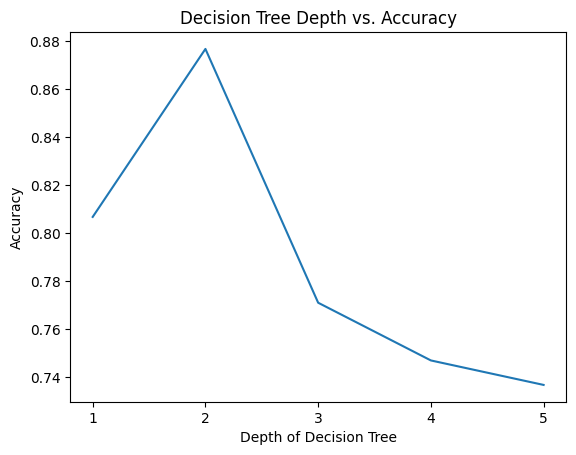

In [74]:
from sklearn.model_selection import KFold
from tqdm import tqdm
import matplotlib.pyplot as plt

kf = KFold(n_splits=5, shuffle=True, random_state=42)
accs = []

for depth in tqdm(range(1, 6)):
    fold_accs = []
    for train_index, test_index in kf.split(data):
        train_data, test_data = data.iloc[train_index], data.iloc[test_index]
        
        tree = DecisionTree(max_depth=depth)
        tree.fit(train_data)
        
        predictions = tree.predict(test_data.iloc[:, :-1])
        actuals = test_data.iloc[:, -1].values
        
        accuracy = np.mean(predictions == actuals)
        fold_accs.append(accuracy)
    
    avg_acc = np.mean(fold_accs)
    accs.append(avg_acc)

plt.plot(range(1, 6), accs)
plt.xlabel('Depth of Decision Tree')
plt.ylabel('Accuracy')
plt.xticks(range(1, 6))
plt.title('Decision Tree Depth vs. Accuracy')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming `data` is your dataset DataFrame
train, test = train_test_split(data, test_size=0.2, random_state=42)

for depth in [2, 4]:
    print(f"------------ max_depth={depth} ------------")
    model = DecisionTree(max_depth=depth)
    model.fit(train)
    train_predictions = model.predict(train.iloc[:, :-1])
    test_predictions = model.predict(test.iloc[:, :-1])

    # Calculate accuracy
    train_accuracy = np.mean(train_predictions == train.iloc[:, -1])
    test_accuracy = np.mean(test_predictions == test.iloc[:, -1])

    print(f'Training accuracy is {train_accuracy}')
    print(f'Test accuracy is {test_accuracy}')
    print()

------------ max_depth=2 ------------
Training accuracy is 0.8851412944393802
Test accuracy is 0.8218181818181818

------------ max_depth=4 ------------
Training accuracy is 0.6855059252506837
Test accuracy is 0.6872727272727273



Use that depth and print the test score. Is it better generalizer than the first one? What do you conclude about the tuning proccess using validation? (answer to yourselves).

## Question 4 - PAC, Bias vs Variance
See attached pdf in moodle assignment!

## Question 5 - Polynomial regression - 5 pts bonus
In this problem you will extend regression to fit nonlinear functions.<br/>
The dataset contains one feature (x) and continiuos prediction (y).

In [ ]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#@title Load data

import requests
from io import BytesIO

def load_npy_file(url):
  response = requests.get(url)
  if response.status_code == 200:
    npy_data = np.load(BytesIO(response.content), allow_pickle=True).item()
    return npy_data
  else:
    return None

In [ ]:
data_dict = load_npy_file('https://sharon.srworkspace.com/ml/datasets/hw3/linreg_data_2d.npy')

x_train = data_dict['x_train']
y_train = data_dict['y_train']
x_test = data_dict['x_test']
y_test = data_dict['y_test']

Look at the plot of the training data. What do you think was the function generated the data? <br/>
<font color='red'>I think the distribution of the data corresponds to a sinusoidal form, maybe somthing including sines and/or cosines</font>

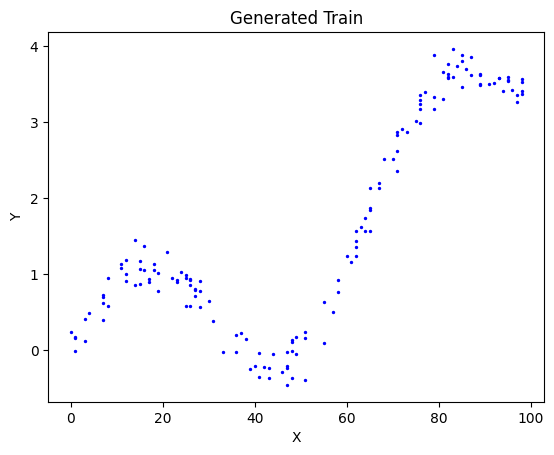

In [ ]:
plt.scatter(x_train, y_train, color='blue', s=2)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Generated Train')
plt.show()

We will assume the polynomial regression problem of the following form:
$$ y=a_0+a_1x+a_2x^2+...+a_dx^d $$
The function ```get_solution``` will find the cofficients, similarly to methods done in simple linear regression. <br/>
The function ```calc``` will recieve a new sample and the cofficients found, and will predict the output.

In [ ]:
def get_solution(X, y, degree=2):
    # Create the Vandermonde matrix for X
    X_vander = np.vander(X, degree + 1, increasing=True)
    # Solve the linear equation X^T * X * a = X^T * y for a
    coefs = np.linalg.solve(X_vander.T @ X_vander, X_vander.T @ y)
    return coefs

def calc(x, coefs):
    # Calculate the polynomial y = a_0 + a_1*x + a_2*x^2 + ... + a_dx^d
    y_pred = np.polyval(coefs[::-1], x)
    return y_pred

Running the current code with $d=1$ yields a simple regressor.
- Which $d$ works best?
- According to your previous answer, which $d$ <u>is expected</u> to work the best?
- Try to explain what happens when you try $d+1$ and why? Was the solver you implemented enough?

<font color='red'>

- $d=4$ is what better fits the data

- From the generated plots and the given analysis, $d=4$ appears to provide the best fit for the data. This choice balances the complexity of the model and the fit to the data, capturing the nonlinear pattern without overfitting.
 
- When trying $d+1$ (which in this case is $d=5$), I observe the following things: 
The model becomes more complex, which can lead to overfitting. This is evident in the plots for degrees higher than 4, where the polynomial starts to capture noise in the training data rather than just the underlying trend. Also, higher degree polynomials tend to overfit the training data, resulting in poor generalization to unseen test data. This can be seen in the graphs for degrees 8 and 10, where the polynomial curves wildly and doesn't follow the true underlying fuction of the data.
I think that the solver I implemented was enough, it really understands the data and is generalizable to new unseen data with a similar shape to the one created.
</font>

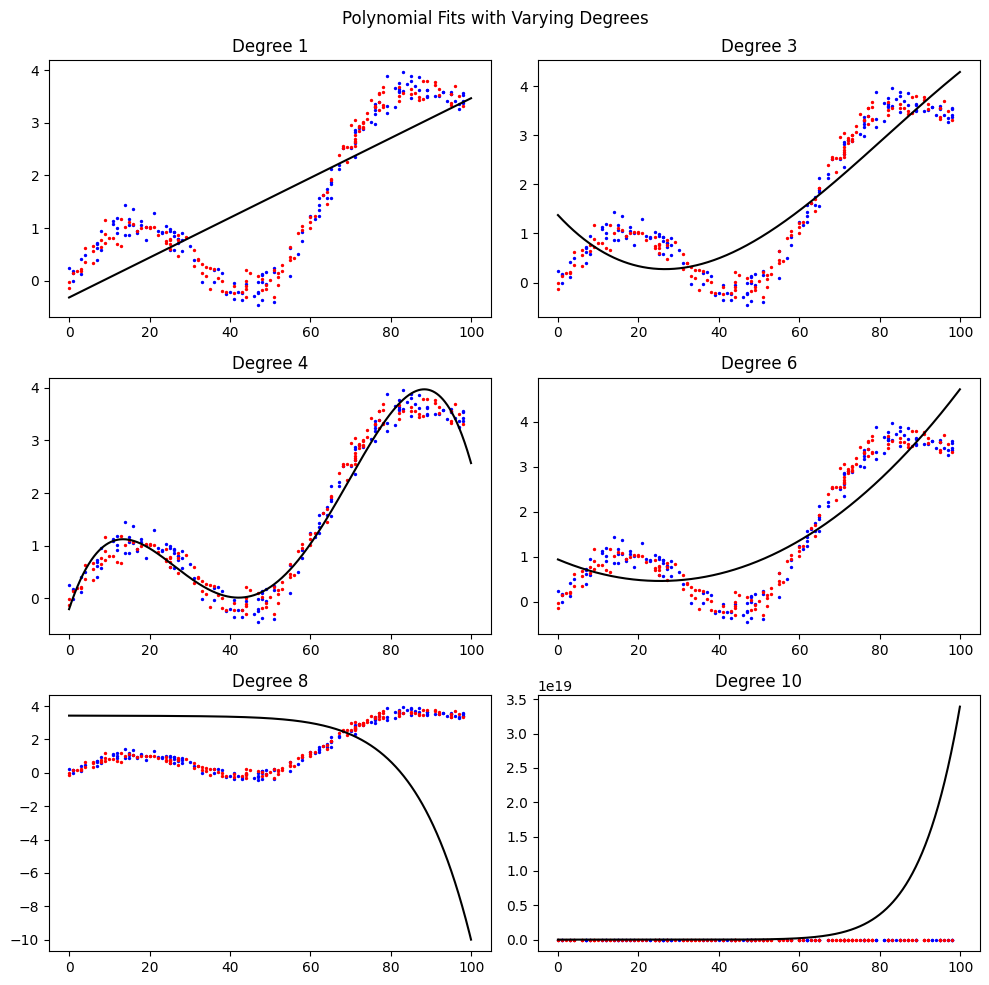

In [ ]:
# I have refactored the code so it outputs different graphs of the fit to different values of degrees
degrees = [1, 3, 4, 6, 8, 10]
xx = np.arange(0, 100, 0.1)

fig, axs = plt.subplots(3, 2, figsize=(10, 10))  # Set up a 2x2 grid
axs = axs.flatten()  # Flatten the 2x2 grid to easily iterate over it
# Ensure x_train is one-dimensional
if x_train.ndim > 1:
    x_train = x_train.reshape(-1)  # Reshape x_train to be one-dimensional

for i, degree in enumerate(degrees):
    yy = []
    weights = get_solution(x_train, y_train, degree)
    for samp in xx:
        yy.append(calc(samp, weights))
    
    axs[i].scatter(x_train, y_train, color='blue', s=2, label='train')
    axs[i].scatter(x_test, y_test, color='red', s=2, label='test')
    axs[i].plot(xx, yy, color='black')
    axs[i].set_title(f'Degree {degree}')

# Add a title for the entire figure and show the plot
plt.suptitle('Polynomial Fits with Varying Degrees')
plt.tight_layout()
plt.show()